# Compare the Risks of a Portfolio of Stocks
In this activity you will compare a basket of stocks and determine if they are risky investments compared to the SP500.

## 1. Import Modules

In [1]:
# Import Modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


## 2. Set paths to `CSV` Files
  - Each csv file contains a stock's closing price and the date of the closing price.

  - Create a `Path` object for each `CSV` filepath.

In [3]:
# Set paths to csv files
hd_csv_path = Path("../Resources/HD.csv")
intc_csv_path = Path("../Resources/INTC.csv")
mu_csv_path = Path("../Resources/MU.csv")
nvda_csv_path = Path("../Resources/NVDA.csv")
tsla_csv_path = Path("../Resources/TSLA.csv")
sp500_path = Path("../Resources/sp500.csv")

## 3. For each `CSV` file read the data into a `pandas` `DataFrame`.

  - Set the index column to be the date.

  - Infer the date time format.

  - Parse all dates when the `CSV` is loaded.

In [4]:
# Read in csv files
hd_df = pd.read_csv(
    hd_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
intc_df = pd.read_csv(
    intc_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
mu_df = pd.read_csv(
    mu_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
nvda_df = pd.read_csv(
    nvda_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)
tsla_df = pd.read_csv(
    tsla_csv_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

sp500_df = pd.read_csv(
    sp500_path, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

## 4. Concatenate the Dataframes into one `DataFrame`
  - Use an inner join.

  - Set the axis to be the columns.

In [5]:
# Concatenate the dataframes into one dataframe
combined_df = pd.concat(
    [hd_df, intc_df, mu_df, nvda_df, tsla_df, sp500_df], axis="columns", join="inner"
)

## 5. Calculate the Daily Percent Changes
  - Drop all n/a values

In [6]:
# Calculate the daily percent changes and drop n/a values
combined_df = combined_df.pct_change().dropna()

In [7]:
# Preview the data
combined_df.head()

,hd_close,intc_close,mu_close,nvda_close,tsla_close,sp500_close
date,,,,,,
2014-05-21,0.001539,0.006144,0.016573,0.000000,0.021249,0.008116
2014-05-22,0.008965,-0.001908,0.006669,0.004386,0.027225,0.002362
2014-05-23,0.005077,0.005354,0.005889,0.009279,0.011812,0.004248
2014-05-27,0.006441,0.015976,0.026711,0.017847,0.020550,0.005988
2014-05-28,-0.000125,0.006365,0.019601,0.008502,-0.006239,-0.001114


## 6. Calculate Sharpe Ratios
  - There are 252 trading days in a year

  - Calculate the average annual return

  - Calculate the annualized standard deviation


In [8]:
# There are 252 trading days in a year
year_trading_days = 252

### Calculate the annual average return

In [9]:
# Calculate the annual average return
average_annual_return = combined_df.mean() * year_trading_days
average_annual_return

hd_close       0.198321
intc_close     0.144027
mu_close       0.177969
nvda_close     0.524966
tsla_close     0.130022
sp500_close    0.092164
dtype: float64

### Calculate the annualized standard deviation

In [10]:
# Calculate the annualized standard deviation
annualized_standard_deviation = combined_df.std() * (year_trading_days) ** (1/2)
annualized_standard_deviation

hd_close       0.187293
intc_close     0.258208
mu_close       0.453929
nvda_close     0.416985
tsla_close     0.436912
sp500_close    0.133162
dtype: float64

### Calculate the Sharpe Ratios
  - The sharp ratio is ratio between the average annual return and the annualized standard deviation.
  - $\frac{R_{p}}{\sigma_{p}}$

In [12]:
# Calculate the sharpe ratios
sharpe_ratios = average_annual_return / annualized_standard_deviation
sharpe_ratios

hd_close       1.058884
intc_close     0.557794
mu_close       0.392063
nvda_close     1.258956
tsla_close     0.297594
sp500_close    0.692122
dtype: float64

## 7. Plot the Sharpe Ratios with a bar plot

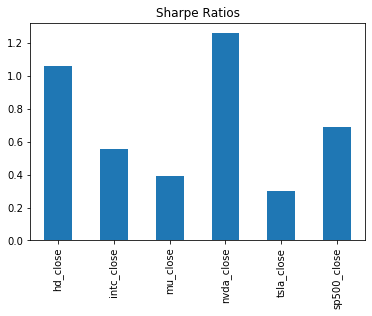

In [13]:
# Plot the sharpe ratios
sharpe_ratios.plot.bar(title="Sharpe Ratios")

plt.show()